![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fdata-science-and-artificial-intelligence&branch=main&subPath=11-training-ai.ipynb&depth=1" target="_parent"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"/></a>

# Training AI

We are going to train an AI system to recognize if an image contains a cat or a dog.

## Training Data

We will use images that are [public domain](https://en.wikipedia.org/wiki/Public_domain) or [Creative Commons](https://creativecommons.org/) because we are allowed to use them without purchasing a license.

The more examples you have, the better the AI will be able to discriminate between dogs and cats. Try to have at least six of each.

1. Create two folders on your computer, one called `cats` and one called `dogs`.
1. Find and download images of cats from [Pexels](https://www.pexels.com/search/cat/) or [Pixabay](https://pixabay.com/images/search/cat/). Put them in your `cats` folder.
1. Find and download images of dogs from [Pexels](https://www.pexels.com/search/dog/) or [Pixabay](https://pixabay.com/images/search/dog/). Put them in your `dogs` folder.

## Teaching the Machine

1. Open [Teachable Machine image training](https://teachablemachine.withgoogle.com/train/image)
1. Rename `Class 1` and `Class 2` as `cat` and `dog` by clicking on the pencil icons.
1. Upload your cat images to the `cat` class and your dog images to the `dog` class.
1. Click the `Train model` button.
1. After the training has finished, click the `Export Model` button, click the middle `Tensorflow` tab, then click the `Download my model` button.
1. Upload your `converted_keras.zip` file to [this folder](.).
1. Run the following cell to set up the image classifier.

In [44]:
from zipfile import ZipFile
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
np.set_printoptions(suppress=True) # Disable scientific notation
import requests
import shutil
import os
from IPython.display import clear_output, display

zip_file = 'converted_keras.zip'
with ZipFile(zip_file, 'r') as zip_object:
    zip_object.extractall()
model = load_model('keras_model.h5', compile=False)
class_names = open('labels.txt', 'r').readlines()
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32) # Create an array of the right shape to feed into the Keras model

def classify_image(image_url, show_image=False):
    filename = image_url.split("/")[-1]
    r = requests.get(image_url, stream=True, headers={'User-Agent':'Mozilla/5.0'})
    with open(filename, 'wb') as f:
        shutil.copyfileobj(r.raw, f)
    image = Image.open(filename).convert("RGB")
    os.remove(filename)
    resized_image = ImageOps.fit(image, (224, 224), Image.Resampling.LANCZOS) # resize the image to 224x224
    data[0] = (np.asarray(resized_image).astype(np.float32) / 127.5) - 1  # normalize the image array and load it
    prediction = model.predict(data)
    index = np.argmax(prediction)
    clear_output()
    if show_image:
        display(resized_image)
    return class_names[index].strip()[2:], prediction[0][index]

print('Model imported and classify_image(image_url) function defined')

Model imported and classify_image(image_url) function defined


Now that we have set up the `classify_image()` function, we can load an image from a link and get its classification.

The function will also return a "confidence score" that is how sure the algorithm is of that classification (`1` means `100%` confident).

In [46]:
image_url = 'https://www.publicdomainpictures.net/pictures/180000/velka/cat-1464103447LmK.jpg'
results = classify_image(image_url)
print(results)

('cats', 0.99968183)


If we use `classify_image(image_url, True)` then it will also show the downloaded and resized image.

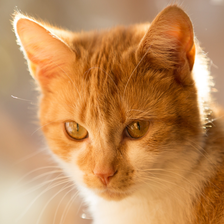

('cats', 0.99968183)


In [47]:
image_url = 'https://www.publicdomainpictures.net/pictures/180000/velka/cat-1464103447LmK.jpg'
results = classify_image(image_url, True)
print(results)

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)